# Imports

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# Overview - History of Neural Networks

Generalized, functional learning algorithms were first developed for multilayer perceptrons and used a "feedforward" design (compared to backpropagation). Alexey Ivakhnenko and V. G. Lapa first published their work in 1967 in Cybernetics and Forecasting Techniques. Then, in 1971, Ivakhnenko published a paper called "Polynomial Theory of Complex Systems," in which he described a deep network with eight layers that was trained by the group method.

After researching backpropagation for his 1974 dissertation, Paul Werbos was the first person in the United States to propose using it for artificial neural networks. Backpropagation is a method for processing errors at the output (not at the input) and distributing them backward through the system's layers for training and learning. It has become a popular method for training deep neural networks.

Lastly, deep learning became a reality in 1989 when Yann LeCun and his colleagues experimented with the standard backpropagation algorithm (created in 1970) and applied it to a neural network. They aimed to teach the computer how to recognize handwritten ZIP codes on mail. This new system worked, and it was the beginning of deep learning.

# 22.1 Introduction to Neural Networks

First used successfully for image classification. Consider an MxN image with 3 color channels
- Has MxNx3 total features, or MxNx3 dimensionality
- While you could develop decision trees on this, would have to be giant data set to avoid risk of overfitting
- A good first step is to pre-process to capture most important features in image to reduce its dimensionality
- Example histogram of gradient (hog)
- For some time focus was on developing best such pre-processing steps

Standard data sets of importance for comparing classifier performance, for example imagenet
- Big database of labeled images
- Contest was held for years for people to enter their best classifier performance
- Step change in performance seen with alexnet, which was a neural network (vs the computer vision approach)

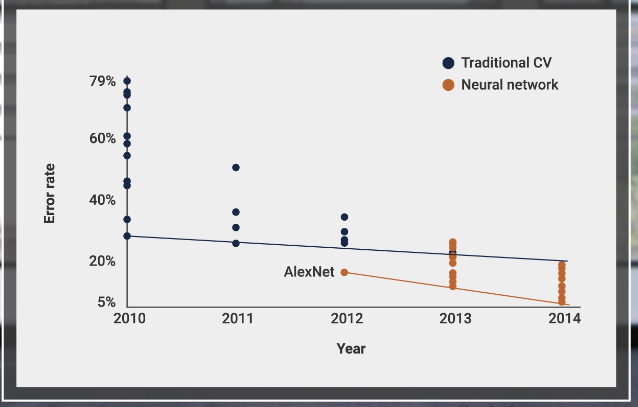

# 22.2 Foundations of NN

Terminology recap

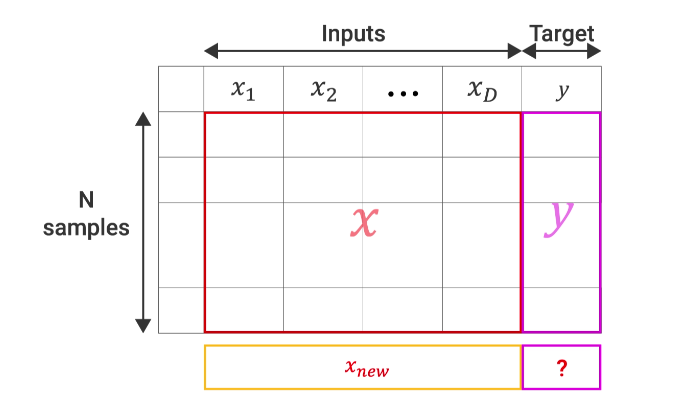

Recapping linear regression
- Find parameters a, b (a is a vector) such that the loss function is minimized
- Remember phi(xi) is a transformation on the input feature space xi

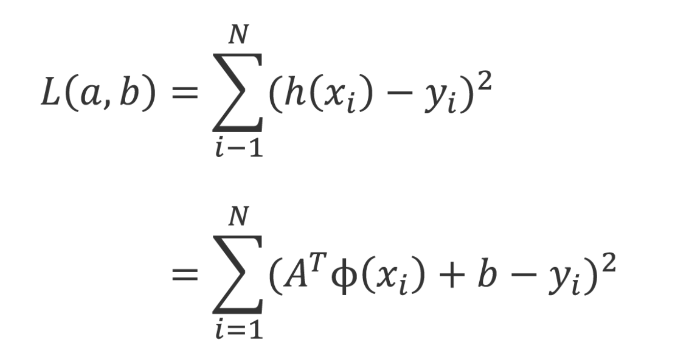

Depicting the above in network form

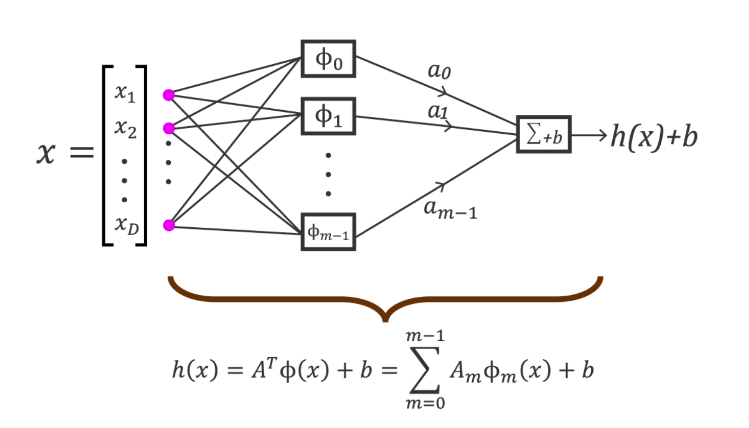

When switching to an nn, several things are generalized. First the phi functions are activation functions, most common are
- sigmoid: acts like a switch, either opening or closing a channel
- tanh: puts saturation limits on outputs of neuron; small values basically unchanged, but truncates large positive or negative values
- relu: prevents any negative numbers

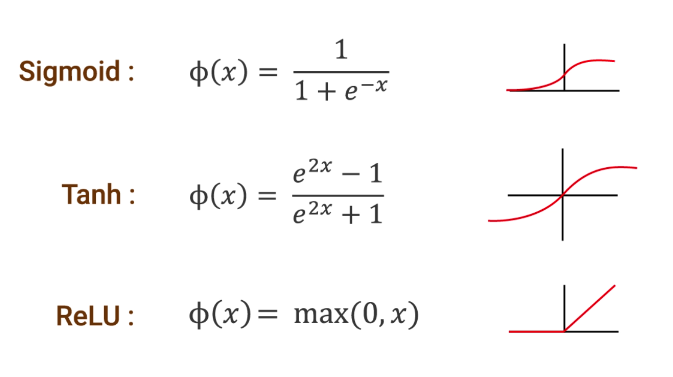

Another generalization
- NN add coefficients to all lines on the network graph, not just ones on output side

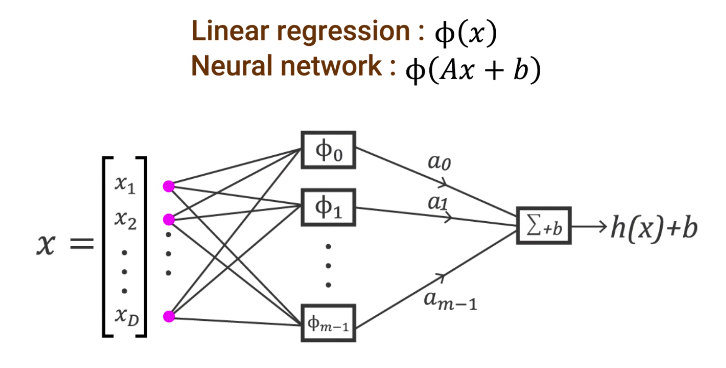

Generalization
- Allow for many layers to be used, not just a single layer
- L total layers, each of which have their own phi(prior layer) transformation
- For L layers, L-1 hidden layers, plus the Lth output (not hidden) layer

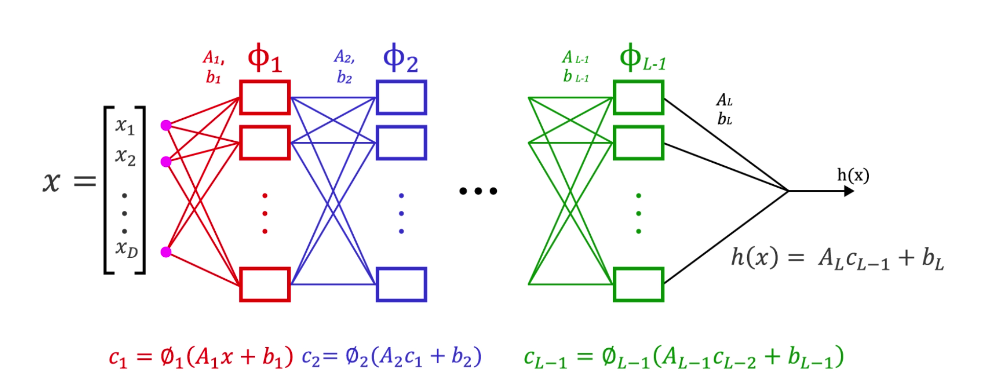

Final generalization
- By adding an activation function on output of outer layer, you can create classifiers
- For example with sigmoid, you can have a binary classifier

Training problem is then to find all A, b such that loss function is minimized

# 22.3 NN Playground

Full walkthrough of calculation, given a 20-year old passenger who paid $8
- consider layers before final layer as generating new features for the next layer
- the generated features are anonymous

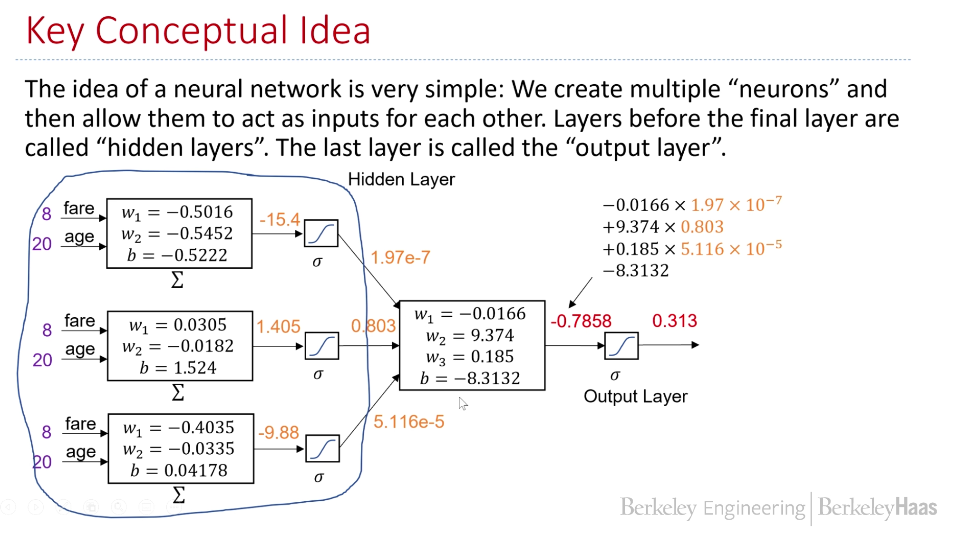

Multiple layers with a programmable number of neurons per layer are fine too

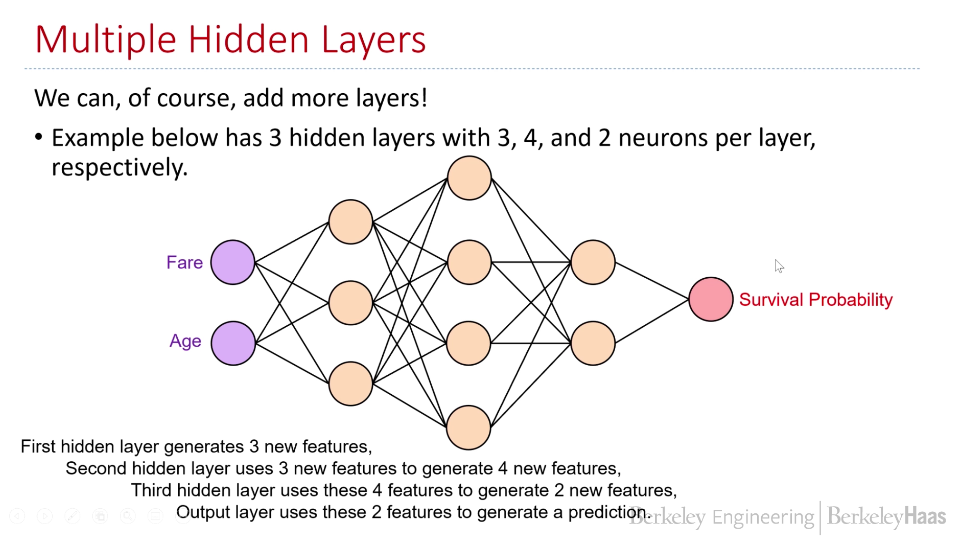

Example separated in quadrants of an x/y plane - come up with a feature that predicts blue

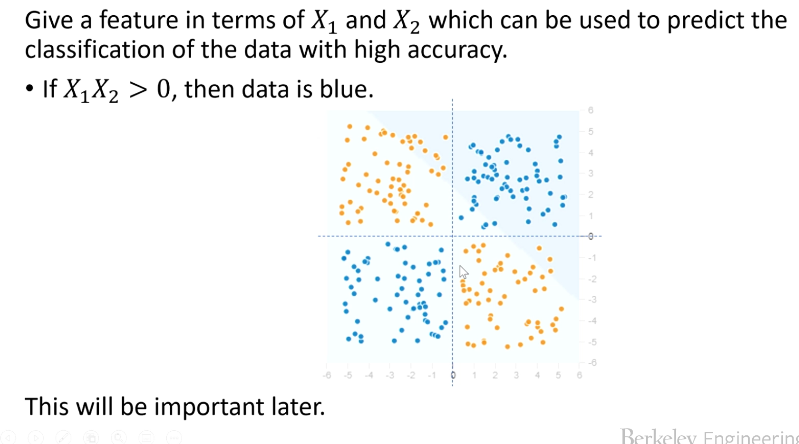

Additional examples shown using [tensor flow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.05622&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

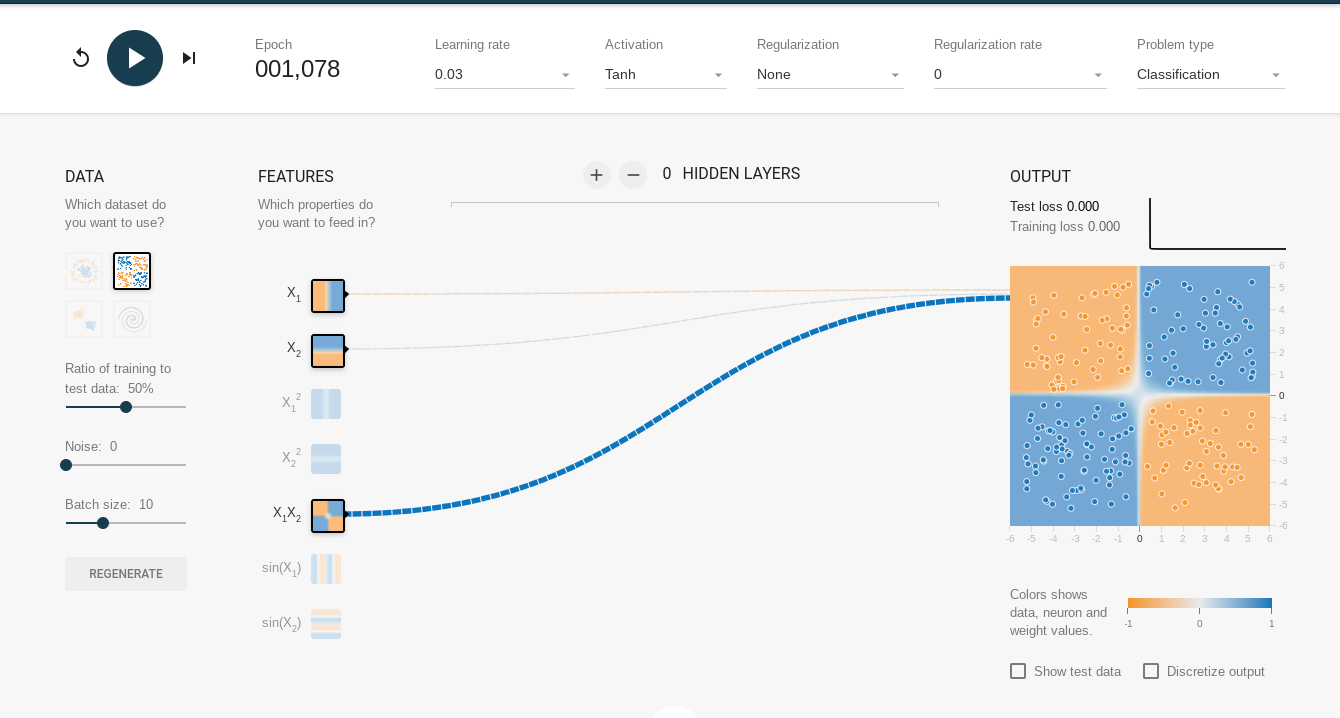

# Overview - intro to Keras

Keras, the high-level API of TensorFlow, is an open-source library that provides an artificial neural network interface for Python. It was designed to be user-friendly, modular, and easy to extend, and it contains numerous implementations of commonly used neural network building blocks, such as neural layers, optimizers, cost functions, activation functions, initialization schemes, and regularization schemes. These are all standalone modules that you can combine to create new models. In addition, models are defined in Python code and not in separate model configuration files.

# 22.4 Keras

Importing the model and developing a NN with 3 hidden layers
- Note sigmoid as final activation function to generate a probability

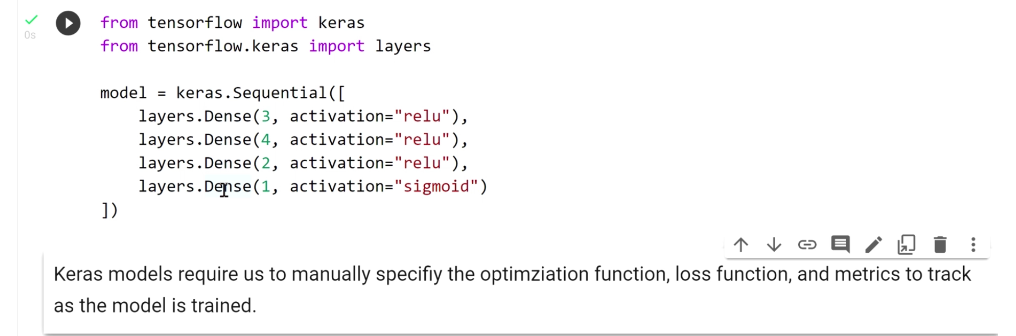

Compile the model with specification of optimization, loss function, and metrics to track

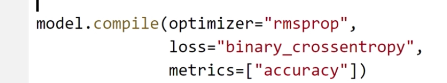

Doing the model fit

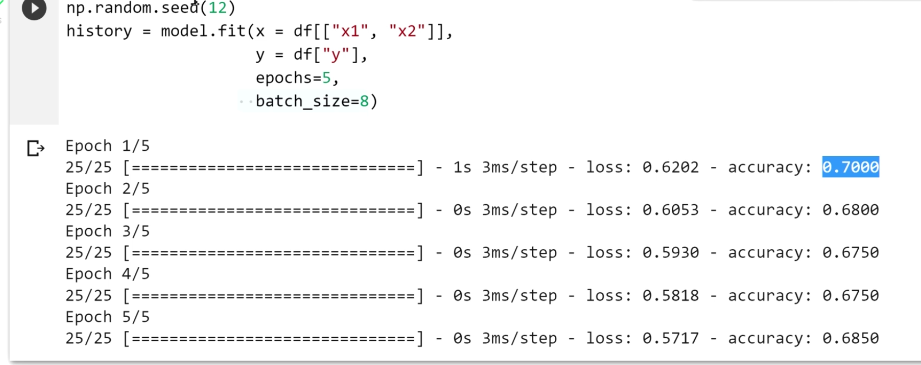

# Overview - Multiclass Classification

Contrary to typical classification tasks where labels are mutually exclusive, multiclass classification requires specialized machine learning algorithms that can predict multiple, mutually non-exclusive classes or labels.

Deep learning neural networks support multiclass classification problems natively. The Keras deep learning library allows network models for multiclass classification tasks to be easily defined and evaluated.

# 22.5 Multiclass Classification

Recall for multi-class classification, had 3 options
- One vs one
- One vs. rest
- Multinomial logistic

While they can all be used for NN, best to not use the one vs. because they require multiple models to be trained and then subject to reconciliation
- Instead use a single model that produces probabilities for each output class

Softmax - how to combine multiple input xi to get yi?

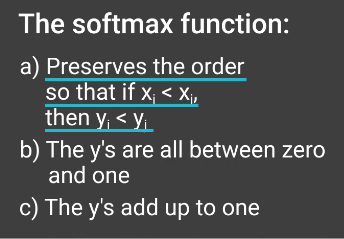

If softmax preserves order, what value is it in the model?
- Not so useful for prediction, but for training the model
- After softmax, the values are one-hot encoded
- Softmax also admits a probabilistic interpretation (but don't confuse a specific NN output with the actual distribution)

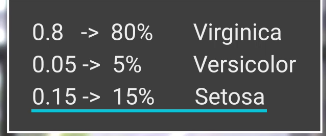

Setting up a model, revisit the iris data set
- label binarizer to apply 1-hot to y

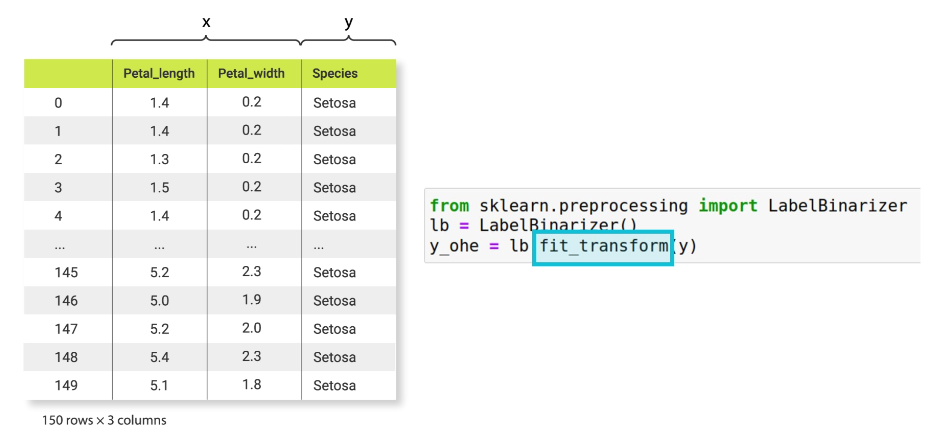

Reverse the 1-hot with inverse

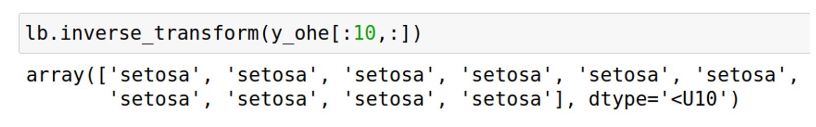

Train the model
- Note output layer has 3 neurons activated with softmax

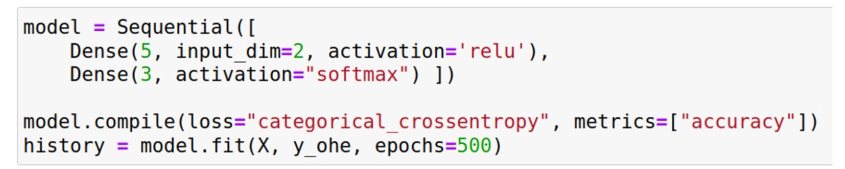

Notes on softmax
- Trained with SGD (stochastic gradient descent)

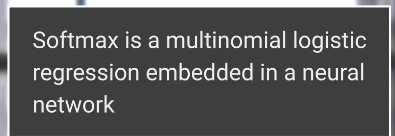

# 22.6 Some Syntax from Keras

integer encoding and cross-entropy loss

Instead of 1-hot encoding, you can also do integer encoding
- setosa -> 0
- versicolor -> 1
- virginica -> 2

Not to be confused with ordinal encoding!
- even though the output would be the same, given the mapping set, vers, virg
- functionally no difference, but select *sparse* cross entropy as loss function

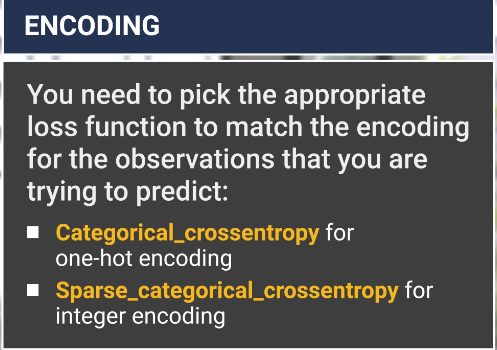

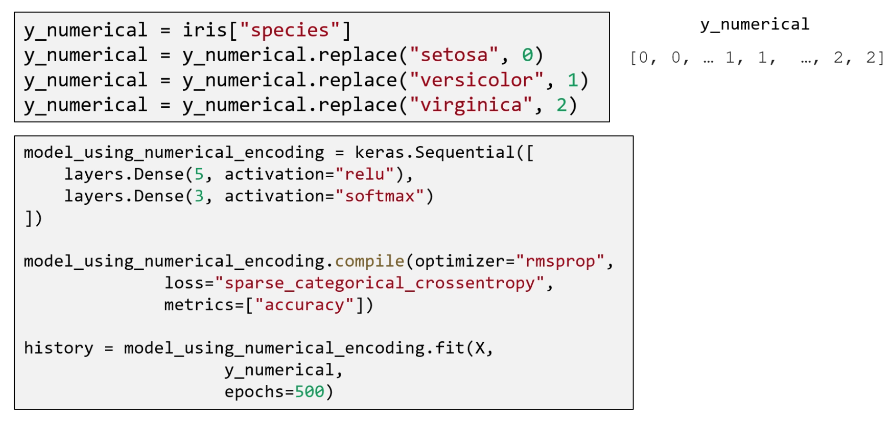

Plotting loss or accuracy
- Professor Hug points out that you can choose to plot either accuracy or loss from the history result
- Apparently history_using_numerical_encoding is the actual output from fit, not just history

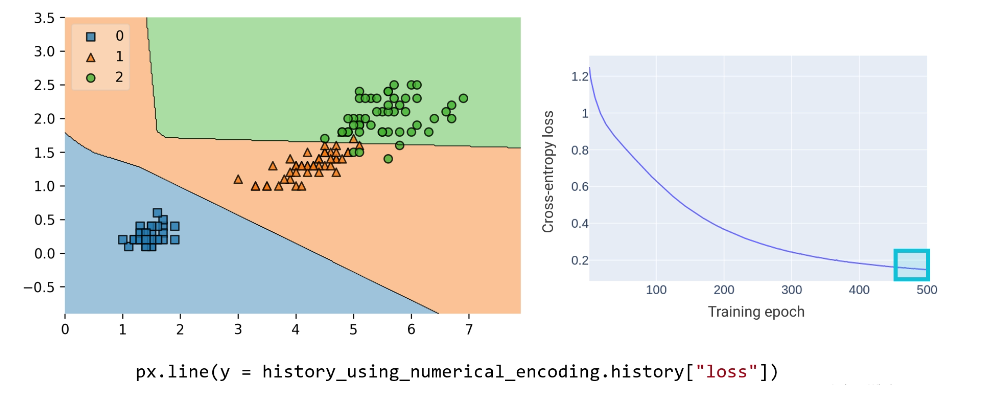